<a href="https://colab.research.google.com/github/j0azz/data-science-portfolio/blob/main/DAST_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

#
#data_url = "https://git.sodexo.com.br/appsec-redteam/dast-reporting/-/raw/master/Detection_Report_sdex-jf_20240215.csv"
#df = pd.read_csv(data_url, on_bad_lines="warn")
#df = pd.DataFrame(uploaded)
df = pd.read_csv(list(uploaded.keys())[0], header=None)
df.head()

def change_severity(value):
  if(value=="Confirmed Vulnerability - Level 5" or value=="Potential Vulnerability - Level 5" or value=="Confirmed Vulnerability - Level 3"):
    return "CRITICAL"
  elif(value=="Confirmed Vulnerability - Level 2" or value=="Potential Vulnerability - Level 4"):
    return "HIGH"
  elif(value=="Confirmed Vulnerability - Level 1" or value=="Potential Vulnerability - Level 2" or value=="Potential Vulnerability - Level 1"):
    return "MEDIUM"
  elif(value=="Information Gathered - Level 1" or value=="Information Gathered - Level 2" or value=="Information Gathered - Level 3"):
    return "LOW"


Saving Detection_Report_sdex-jf_20240215 (1).csv to Detection_Report_sdex-jf_20240215 (1).csv


,0,1,2,3,4,5,6,7,8,9,10
0,Status,QID,Type,Name/Title,Group,Last Detected,Age,Patch,Severity,Web Application,URL;
1,NEW,150124,QUALYS,Clickjacking - Framable Page,Information Disclosure,09 Feb 2024 04:01 AM UTC,6,'-,Confirmed Vulnerability - Level 3,BRS-BR_sodexobeneficios.com.br/,https://www.sodexobeneficios.com.br/themes/cus...
2,NEW,150124,QUALYS,Clickjacking - Framable Page,Information Disclosure,09 Feb 2024 04:01 AM UTC,6,'-,Confirmed Vulnerability - Level 3,BRS-BR_sodexobeneficios.com.br/,https://www.sodexobeneficios.com.br/sites/g/fi...
3,ACTIVE,150630,QUALYS,CORS header misconfigured,Information Disclosure,09 Feb 2024 04:01 AM UTC,8,'-,Potential Vulnerability - Level 1,BRS-BR_homolog-portal.sodexobeneficios.com.br/,https://homolog-portal.sodexobeneficios.com.br...
4,NEW,150004,QUALYS,Path-Based Vulnerability,Path Disclosure,05 Feb 2024 04:01 AM UTC,10,'-,Confirmed Vulnerability - Level 2,BRS-BR_api-awsportal-hml.sodexobeneficios.com.br/,https://api-awsportal-hml.sodexobeneficios.com...


In [2]:
#vulns_found = pd.DataFrame(set(df.iloc[:,3]))
vulns_found_full = pd.concat([df[4],df[3]], axis=1)
#vulns_found_full.head()
vulns_in_app_count = df[9].value_counts()

vulns_in_app_count

BRS-BR_pedefacil.sodexobeneficios.com.br/                      1164
BRS-BR_sodexobeneficios.com.br/                                 322
BRS-BR_sodexocredenciamento.com.br/                             121
BRS-BR_indice.sodexobeneficios.com.br/                          100
BRS-BR_backoffice.sodexobeneficios.com.br/                       98
BRS-BR_desenv-portal.sodexobeneficios.com.br                     89
BRS-BR_wiseit.sodexo.com.br/                                     84
BRS-BR_ backoffice.desenv-portal.sodexobeneficios.com.br         81
BRS-BR_b2c.sodexobeneficios.com.br/                              65
BRS-BR_intranet.sodexo.com.br/                                   63
BRS-BR_backoffice.homolog-portal.sodexobeneficios.com.br         59
BRS-BR_usuarios.sodexomulti.com.br/                              57
BRS-BR_homolog2-portal.sodexobeneficios.com.br                   54
BRS-BR_saldocartao.sodexo.com.br                                 52
BRS-BR_homolog-compre.sodexobeneficios.com.br   

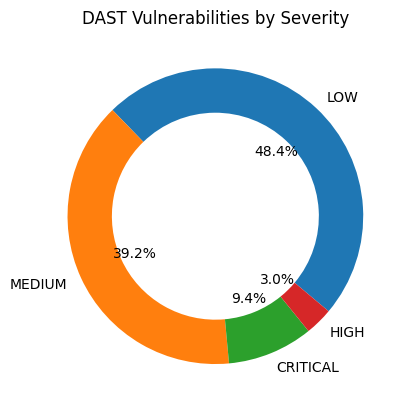

In [5]:
# PLOT VULNERABILITIES BY SEVERITY
severity = df[8].copy()
severity.iloc[:] = severity.iloc[:].apply(change_severity)
labels = severity.value_counts().index.to_list()
sizes = severity.value_counts().to_list()
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=-40, wedgeprops=dict(width=0.3))
ax.set_title("DAST Vulnerabilities by Severity")
plt.show()

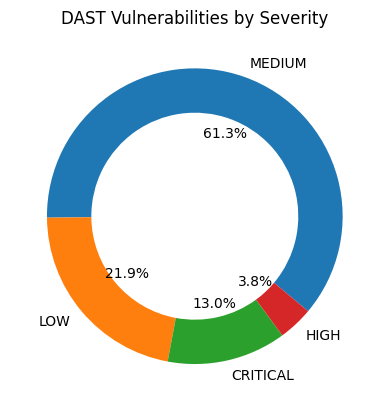

In [17]:
# PLOT VULNERABILITIES BY SEVERITY IN A SPECIFIC APP
app_severity = df[df[9]=="BRS-BR_sodexobeneficios.com.br/"].copy()
app_severity.iloc[:,8] = app_severity.iloc[:,8].apply(change_severity)

labels = app_severity[8].value_counts().index.to_list()
sizes = app_severity[8].value_counts().to_list()
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=-40, wedgeprops=dict(width=0.3))
ax.set_title("DAST Vulnerabilities by Severity")
plt.show()

In [7]:
# PREPARE DATA FOR PLOTTING
import matplotlib.pyplot as plt

apps_no_missing = []
apps = []

for app in vulns_in_app_count.keys():
  dataframe_no_missing_values = df[(df[9]==app) & (df[0]!="'-")].copy()
  dataframe = df[df[9]==app].copy()
  apps_no_missing.append([dataframe_no_missing_values,dataframe_no_missing_values[0].value_counts()])
  apps.append([dataframe, 0,app])
apps = apps[:-1]
#apps_copy = apps.copy()
#apps[0][0].iloc[:,0] = apps[0][0].iloc[:,0].replace("'-", "ACTIVE")


for i in range(len(apps)):
  apps[i][0].iloc[:, 0] = apps[i][0].iloc[:, 0].apply(lambda x: "ACTIVE" if x == "'-" else x)
  apps[i][1]=apps[i][0][0].value_counts()


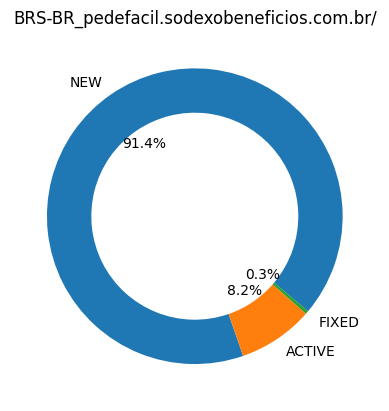

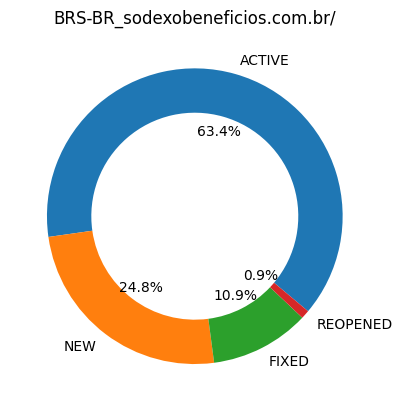

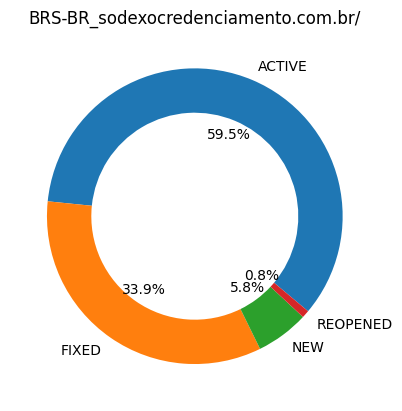

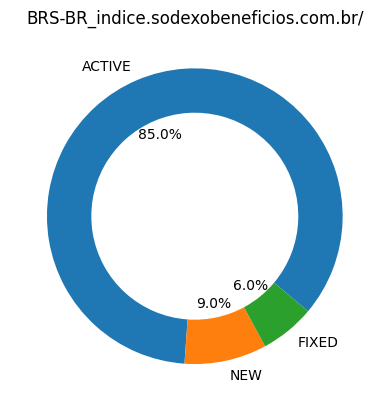

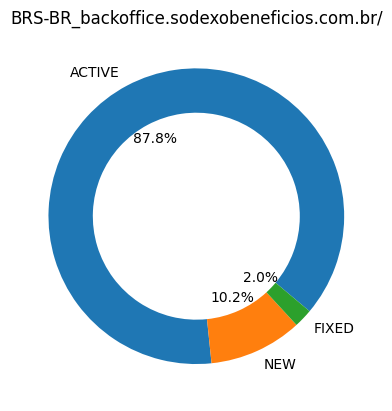

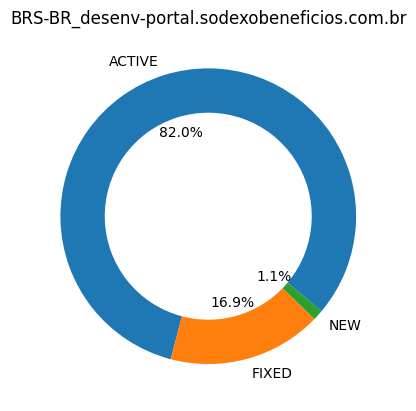

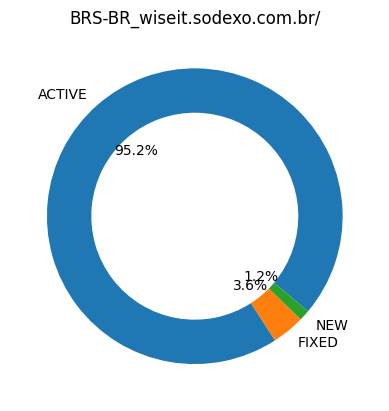

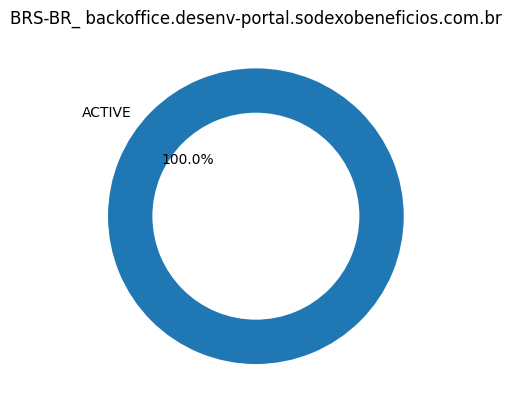

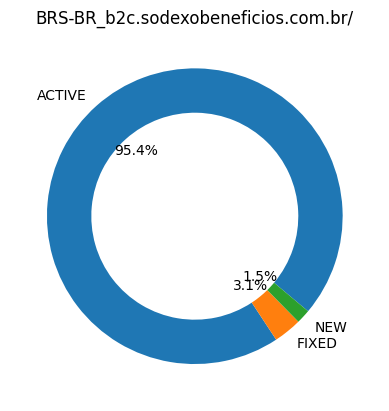

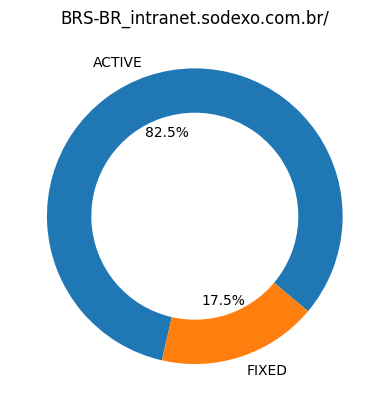

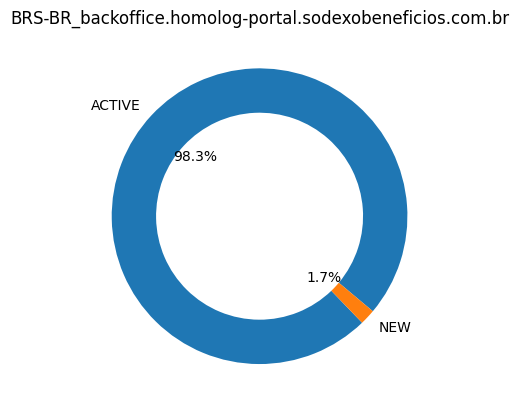

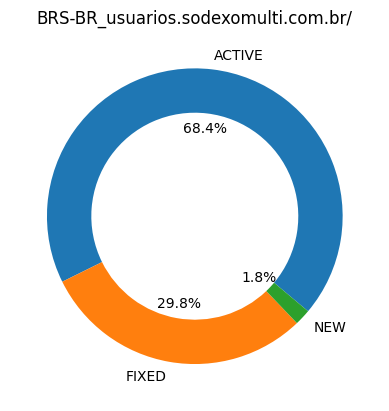

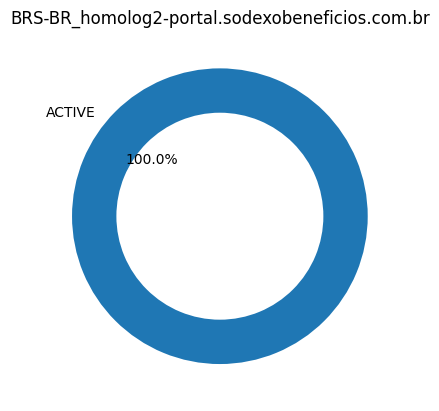

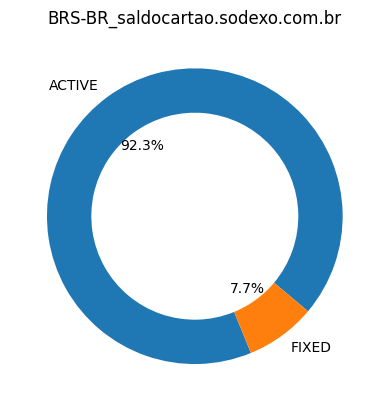

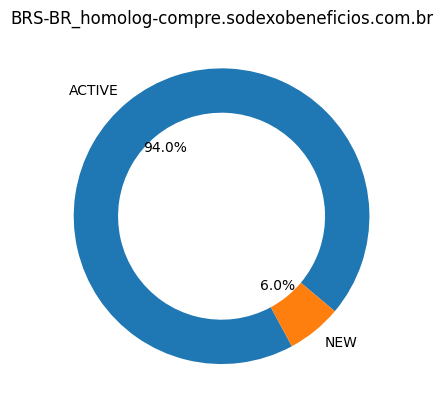

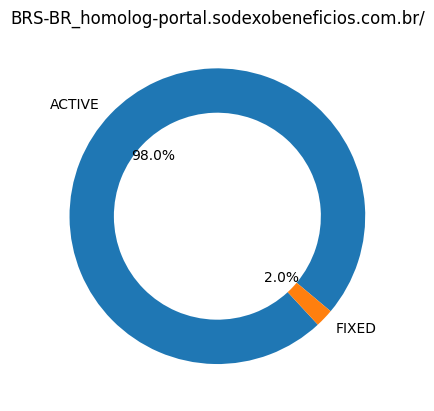

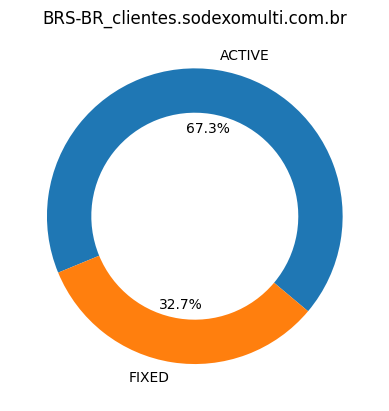

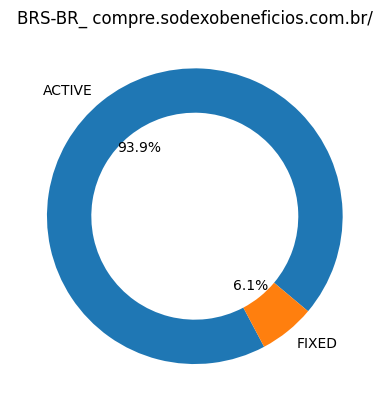

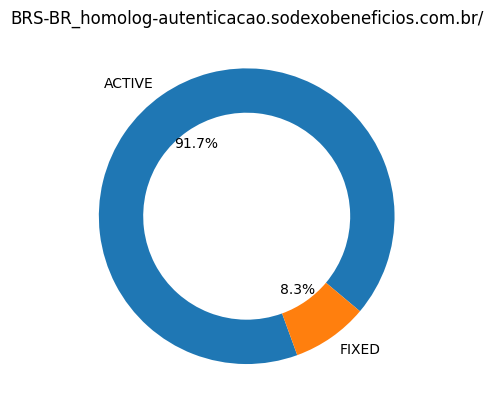

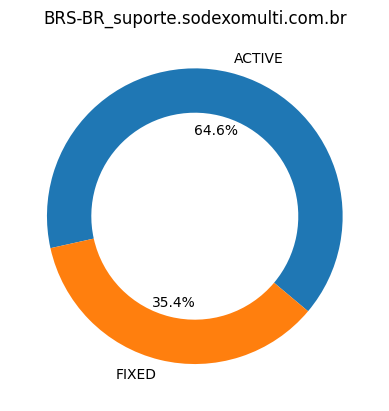

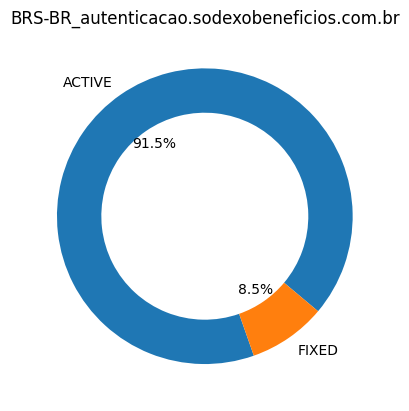

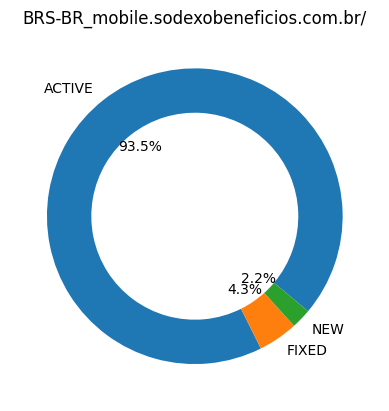

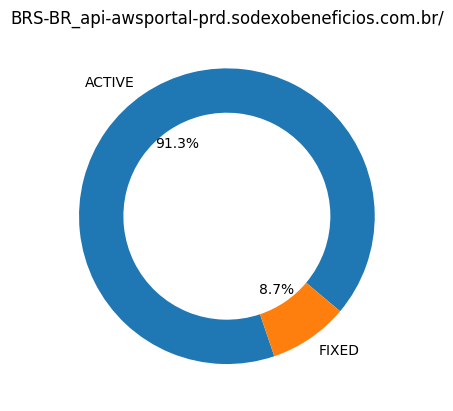

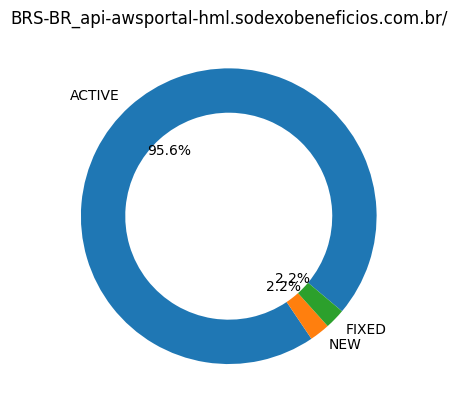

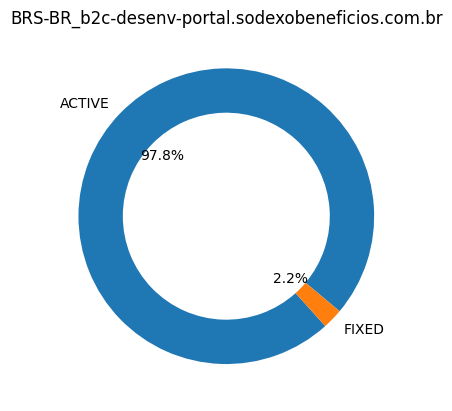

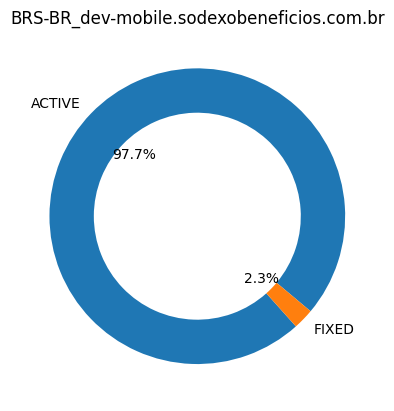

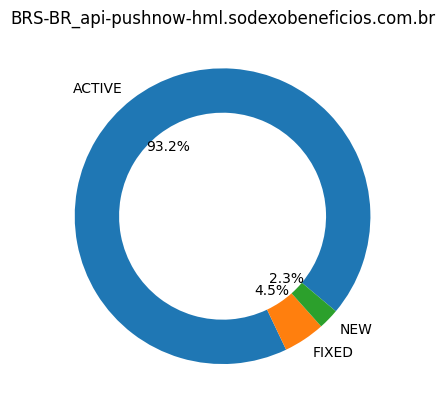

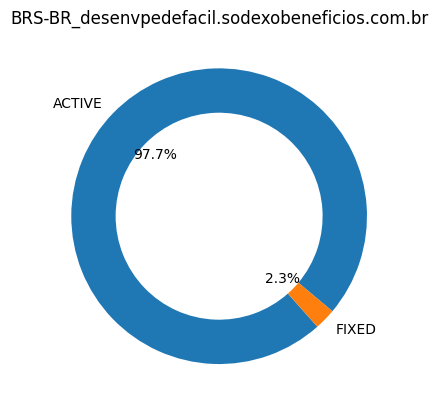

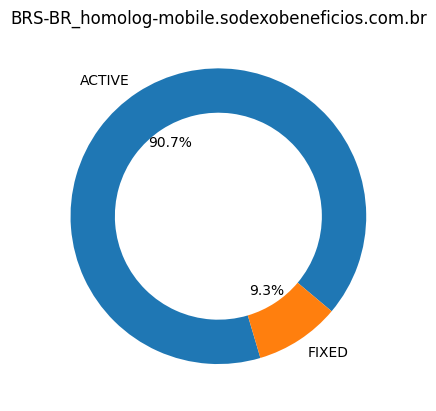

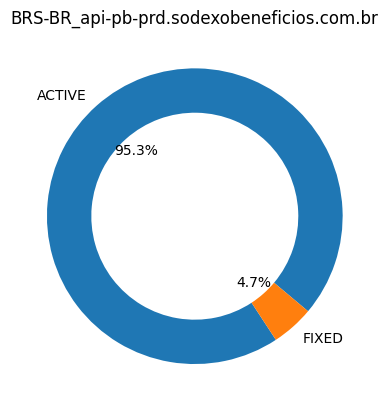

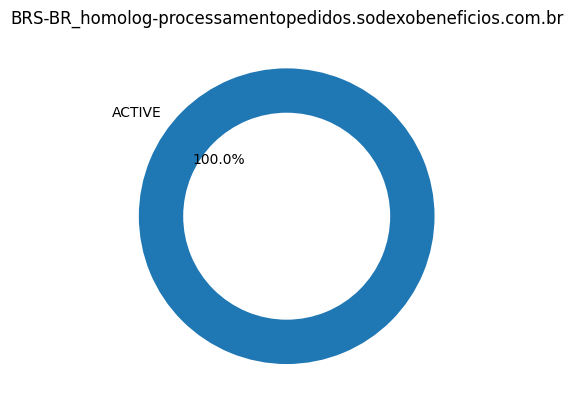

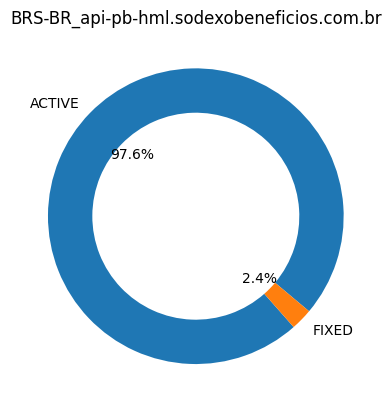

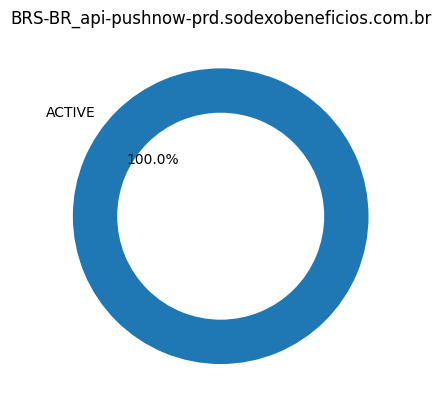

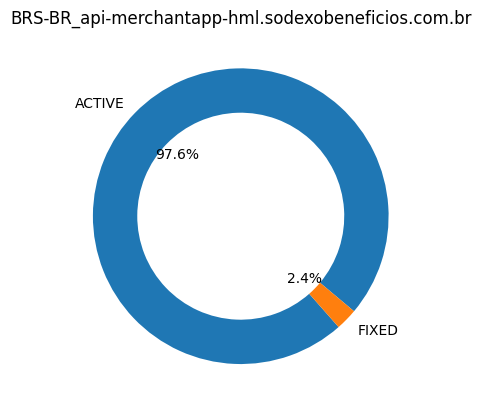

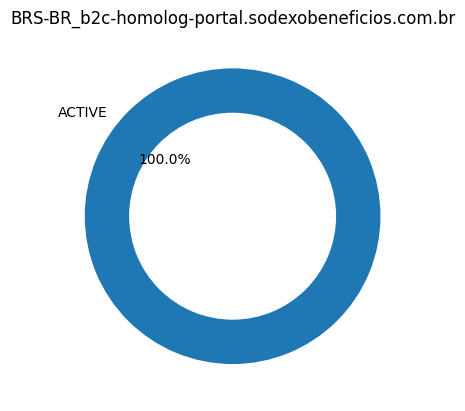

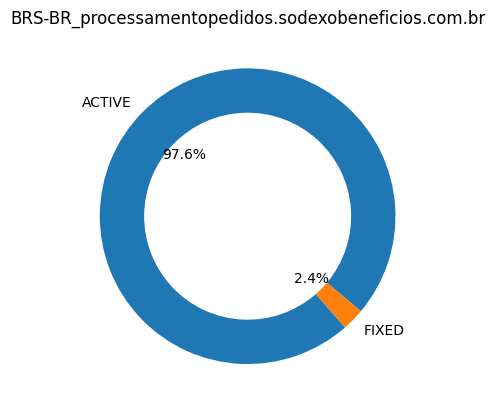

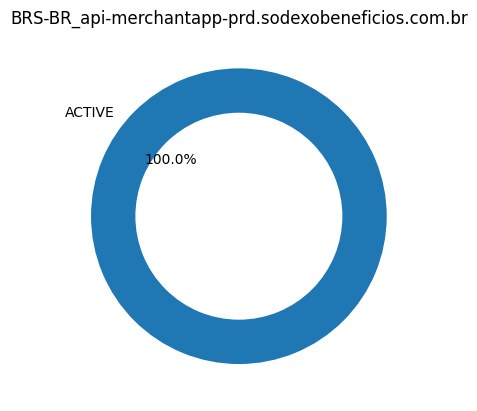

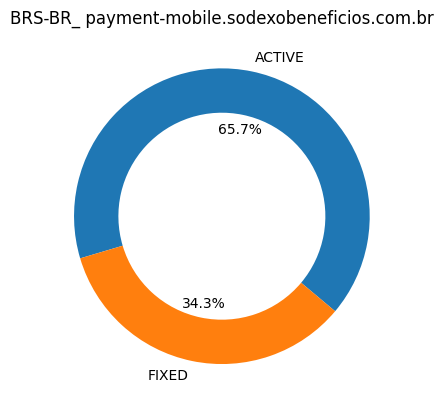

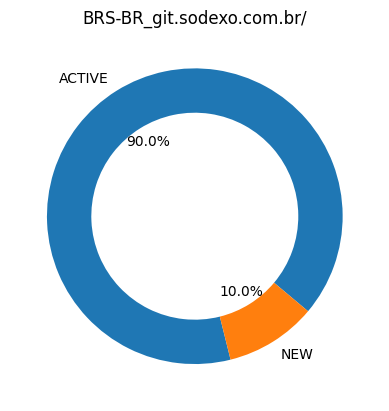

In [8]:
# GENERATE ALL VULNERABILITIES STATUS GRAPHS FOR EACH APP
for i in range(len(apps)):
  labels = apps[i][1].index.to_list()
  sizes = apps[i][1].to_list()
  fig, ax = plt.subplots()
  wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=-40, wedgeprops=dict(width=0.3))
  ax.set_title(apps[i][2])
  plt.show()

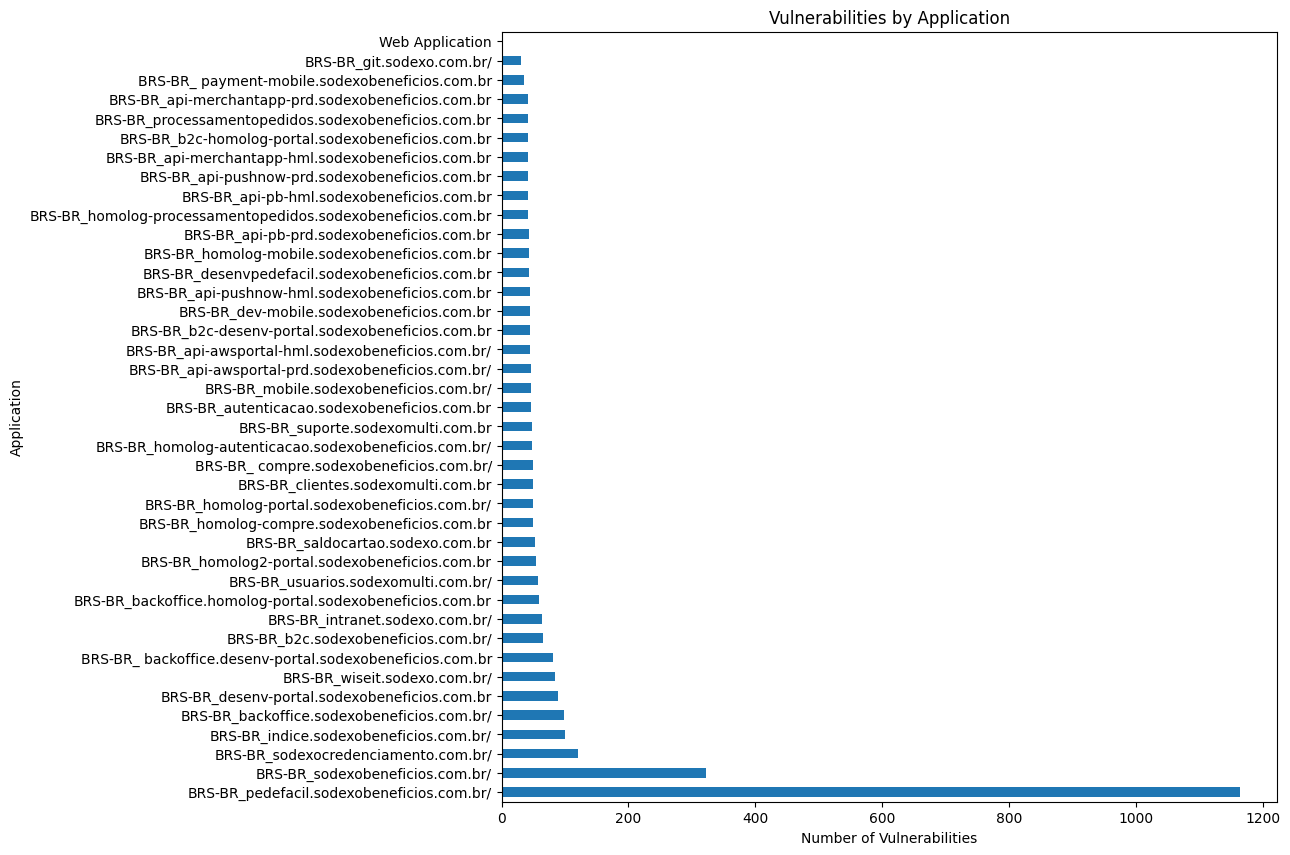

In [19]:
vulns_in_app_count.plot.barh(figsize=(10,10))
plt.xlabel("Number of Vulnerabilities")
plt.ylabel("Application")
plt.title("Vulnerabilities by Application")
plt.show()


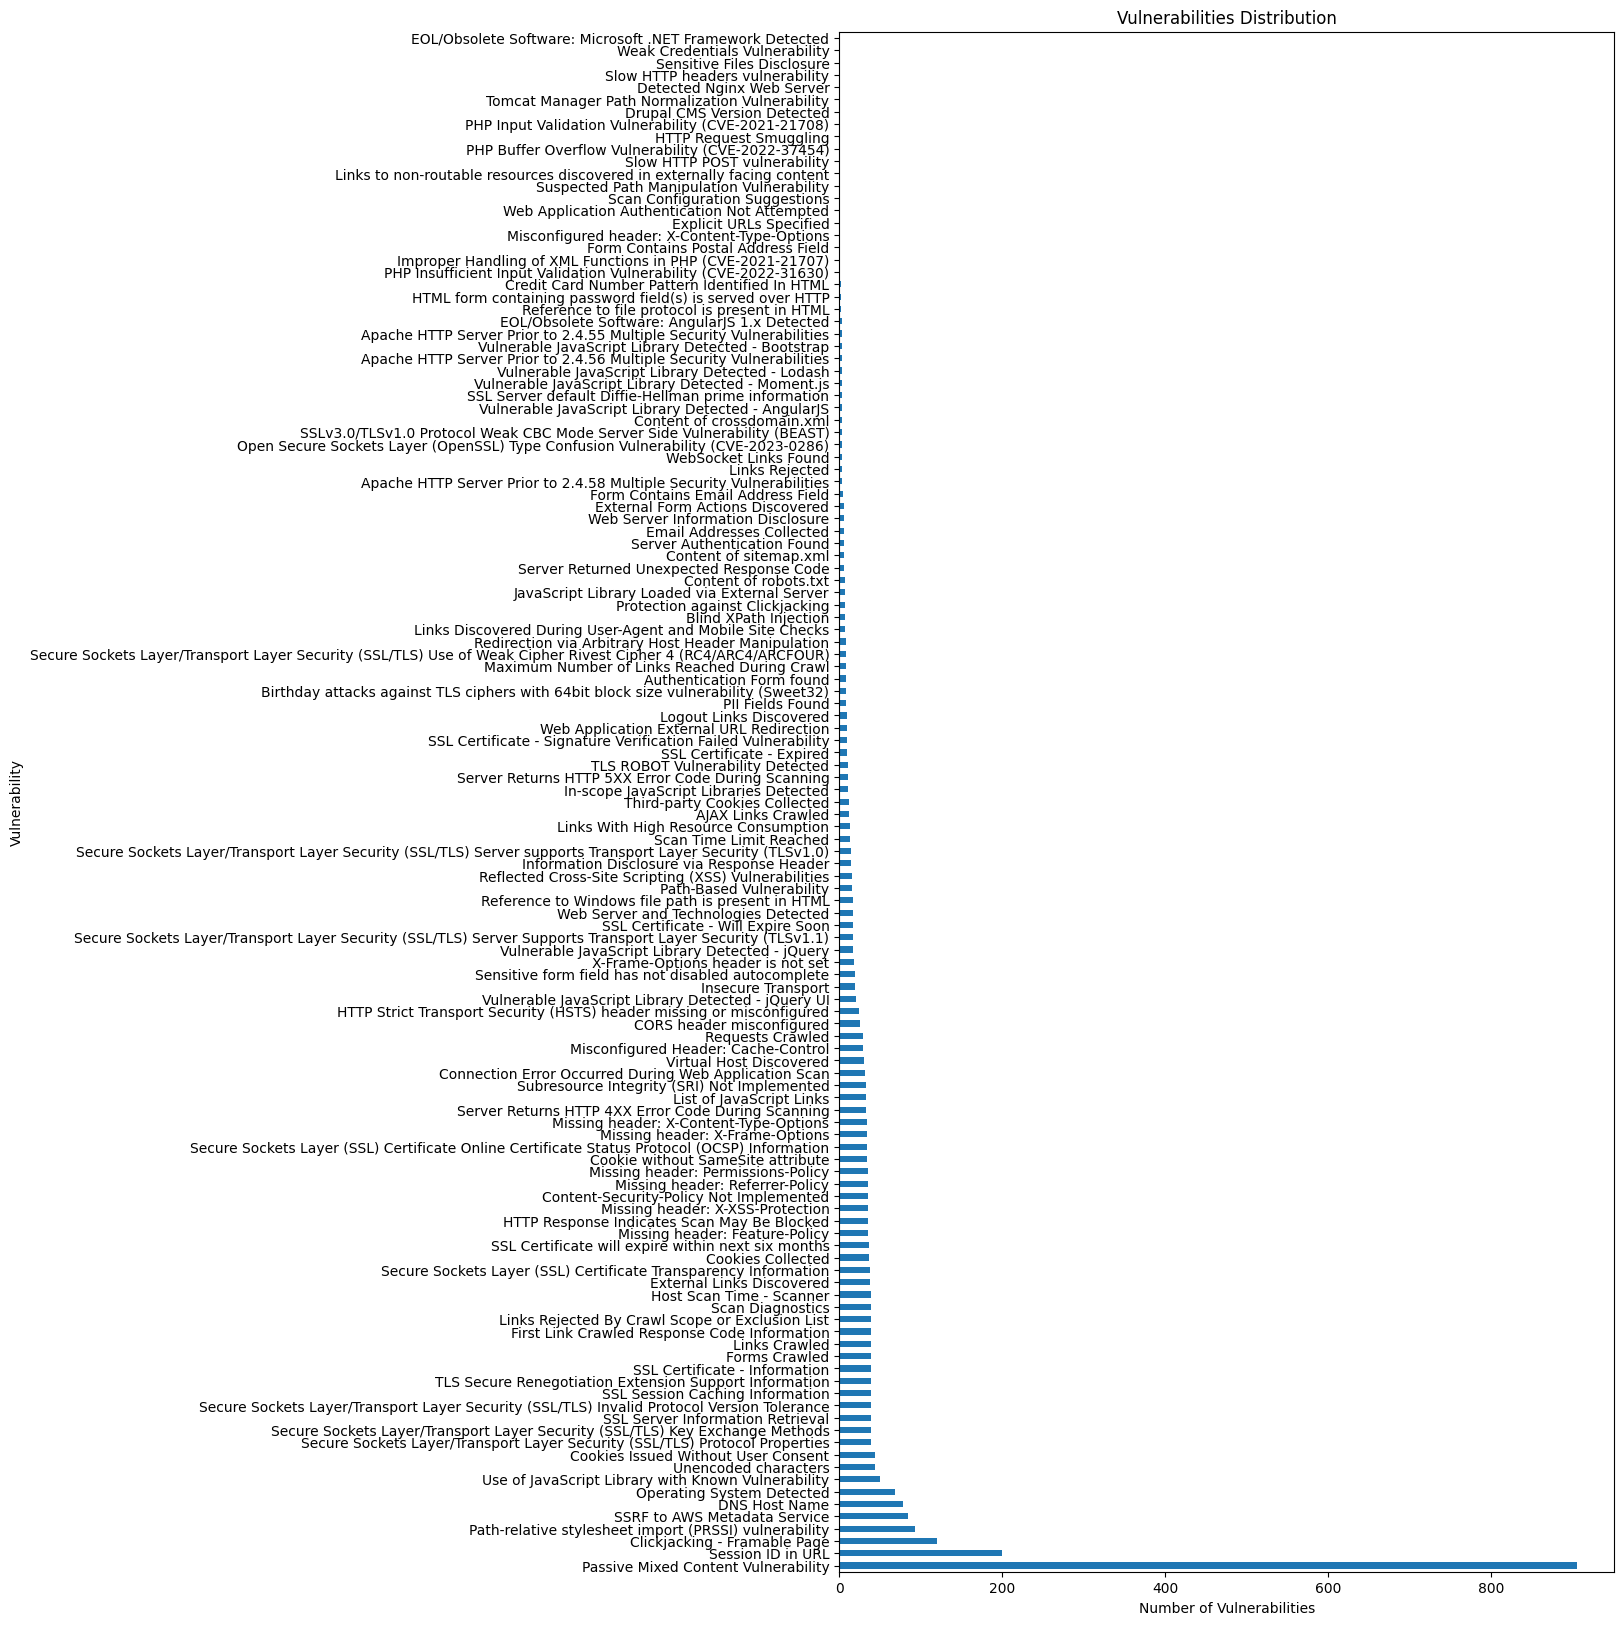

In [12]:
df[3][1:].value_counts().plot.barh(figsize=(10,20))
plt.xlabel("Number of Vulnerabilities")
plt.ylabel("Vulnerability")
plt.title("Vulnerabilities Distribution")
plt.show()
